<a href="https://colab.research.google.com/github/juagarmar/NLP/blob/main/Sentiment_Analysis_syntheticdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import os

In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
df=pd.read_csv('/content/reviews.csv', encoding='unicode_escape')

NameError: name 'Falsegg' is not defined

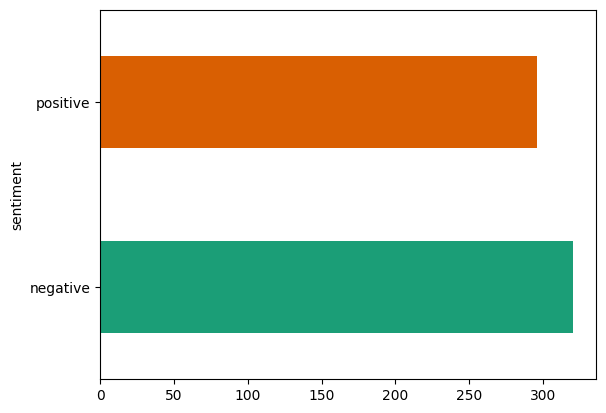

In [7]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(Falsegg)

In [8]:
# Define the function to remove "@" mentions from a string
def remove_mention(text):
    # Check if the text is a string
    if isinstance(text, str):
        # Split the text into words and filter out any word that starts with '@'
        msg = [word for word in text.split() if not word.startswith('@')]
        # Join the filtered words back into a single string
        return ' '.join(msg)
    else:
        # If the text is not a string, return it as is or handle it as you see fit
        return text  # or return '' or return 'placeholder'


# Apply the function to the 'text' column in the DataFrame
df['text'] = df['text'].apply(remove_mention)
#print(df_simple)

In [9]:
# Characters
import re
def remove_unnecessary_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
df['text'] = df['text'].apply(remove_unnecessary_characters)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

# Define the maximum number of words to keep
max_words = 300

# Initialize the tokenizer with a max number of words
tokenizer = Tokenizer(num_words=max_words)

# Fit the tokenizer on the texts
tokenizer.fit_on_texts(df['text'])

# Convert text to sequences of integers
sequences = tokenizer.texts_to_sequences(df['text'])

# Output the results to see the tokenized sequences
print(sequences)

[[1, 13, 194, 140, 70], [240, 72, 20, 63, 106, 10, 95], [241, 35, 29, 10, 30], [66, 92, 87, 153, 223, 95, 47, 4, 164, 116], [67, 66, 13, 242], [1, 73, 31, 68, 52, 130, 106, 10, 72, 195, 63], [9, 2, 48, 36, 35], [29, 173, 196, 165, 2, 38, 66, 13], [106, 10, 95, 4, 13, 32, 9, 141], [166, 35, 106, 10, 72, 195, 63], [13, 19, 43, 21, 10, 56, 1, 64], [88, 8, 1, 35, 48, 36], [10, 53, 61, 53, 2, 39, 154, 9, 174, 88], [243, 95, 116, 10, 74], [89, 13, 71, 197], [48, 36, 35, 28, 1, 64], [54, 13, 21, 10, 56, 1], [65, 48, 50], [155, 88, 8, 1, 13], [10, 1, 40, 31, 68, 130, 156, 33, 40], [13, 19, 43, 71, 12, 142], [10, 167, 21, 10, 58, 244], [38, 37, 36, 21, 5, 32], [89, 35, 71, 197], [54, 13, 21, 71, 12, 142], [32, 43, 21, 2, 48, 50, 47, 4, 164], [48, 36, 28, 1, 64], [10, 1, 73, 21, 107, 10, 1, 40], [245, 32, 43, 2, 284], [71, 21, 5, 123, 1, 93, 143], [61, 13, 56, 1, 64], [96, 8, 16, 31, 29, 95, 116], [58, 35, 75, 16, 55], [74, 8, 1, 13, 29, 30], [51, 57, 8, 16, 31, 58, 175], [107, 56, 1, 63, 198, 3

In [14]:
x = sequences
y = df['sentiment']
y = df['sentiment'].map({'positive': 0, 'negative': 1}).values

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = 256
vocab_size = 10000
# Build the model
model = Sequential([
    Embedding(vocab_size, 16, input_length=max_length),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    #Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 16)           160000    
                                                                 
 global_average_pooling1d (  (None, 16)                0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160289 (626.13 KB)
Trainable params: 160289 (626.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

In [20]:
# Train the model
epochs = 100
history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=2)

Epoch 1/100
13/13 - 0s - loss: 0.6887 - accuracy: 0.6748 - val_loss: 0.6889 - val_accuracy: 0.8235 - 182ms/epoch - 14ms/step
Epoch 2/100
13/13 - 0s - loss: 0.6875 - accuracy: 0.7403 - val_loss: 0.6879 - val_accuracy: 0.8382 - 103ms/epoch - 8ms/step
Epoch 3/100
13/13 - 0s - loss: 0.6867 - accuracy: 0.6578 - val_loss: 0.6849 - val_accuracy: 0.6618 - 96ms/epoch - 7ms/step
Epoch 4/100
13/13 - 0s - loss: 0.6842 - accuracy: 0.7694 - val_loss: 0.6857 - val_accuracy: 0.7206 - 104ms/epoch - 8ms/step
Epoch 5/100
13/13 - 0s - loss: 0.6824 - accuracy: 0.8131 - val_loss: 0.6826 - val_accuracy: 0.7304 - 105ms/epoch - 8ms/step
Epoch 6/100
13/13 - 0s - loss: 0.6798 - accuracy: 0.7379 - val_loss: 0.6806 - val_accuracy: 0.7794 - 104ms/epoch - 8ms/step
Epoch 7/100
13/13 - 0s - loss: 0.6785 - accuracy: 0.7476 - val_loss: 0.6789 - val_accuracy: 0.8480 - 110ms/epoch - 8ms/step
Epoch 8/100
13/13 - 0s - loss: 0.6741 - accuracy: 0.7379 - val_loss: 0.6746 - val_accuracy: 0.6961 - 99ms/epoch - 8ms/step
Epoch 9/1